In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Corrected imports for specific functions:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Input

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
# Load the credit card data
df = pd.read_csv('./creditcard2.csv')
df_clean = df.copy()

In [31]:
# Display the first few rows of the dataframe
df_clean.head()
df_clean.describe()
df_clean.value_counts()
# creditcard_data.info()

Time      V1          V2          V3         V4         V5         V6         V7          V8          V9         V10        V11        V12        V13        V14        V15        V16        V17        V18        V19        V20        V21         V22        V23        V24        V25        V26        V27        V28        Amount  Class
163152.0  -1.196037    1.585949    2.883976   3.378471   1.511706   3.717077   0.585362   -0.156001    0.122648   4.217934   1.385525  -0.709405  -0.256168  -1.564352   1.693218  -0.785210  -0.228008  -0.412833   0.234834   1.375790  -0.370294    0.524395  -0.355170  -0.869790  -0.133198   0.327804  -0.035702  -0.858197  7.56    0        18
          -1.203617    1.574009    2.889277   3.381404   1.538663   3.698747   0.560211   -0.150911    0.124136   4.220998   1.384569  -0.706897  -0.256274  -1.562583   1.692915  -0.787338  -0.226776  -0.412354   0.234322   1.385597  -0.366727    0.522223  -0.357329  -0.870174  -0.134166   0.327019  -0.042648  -0.85526

In [32]:
amounts = df_clean['Amount'].values.reshape(-1, 1) 
# This takes all the values in the amount column and reshapes them first into a 1d array and then reshapes them into a 2d array which machine learning models expect
df_clean['Amount']

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284807, dtype: float64

In [33]:
time = df_clean['Time'].values.reshape(-1,1)
# This takes all the values in the time column and reshapes them first into a 1d array and then reshapes them into a 2d array which machine learning models expect
df_clean['Time']

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64

In [34]:
scaler = StandardScaler()
# Initialize the StandardScaler

In [35]:
y = df_clean['Class'].values
x = df_clean.drop(['Class'], axis = 1).values
# separate the data the model studies from the data it is tested on

In [51]:
import numpy as np

# Apply Log transformation (adding 1 to avoid log(0))
# df_clean['Amount'] = np.log1p(df_clean['Amount'])

# Now re-run your Train/Test split and Scaling

In [52]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, stratify=y)
sm = SMOTE(random_state=42)



In [53]:
x_resampled, y_resampled = sm.fit_resample(xtrain, ytrain)
print(pd.Series(y_resampled).value_counts())

0    227451
1    227451
Name: count, dtype: int64


In [54]:
# model = Sequential([
#     # This is the "Input Object" the warning is asking for
#     Input(shape=(x_resampled.shape[1],)), 
    
#     # Now the layers follow without needing input_dim
#     Dense(32, activation='relu'),
#     Dense(16, activation='relu'),
#     Dropout(0.2),
#     Dense(1, activation='sigmoid')
# ])
# # So basically what we are doing is creating all the layers of the neural network
# # First suppose we want to express the input as 32 neurons
# # Our dataset has 30 features
# # Each neuron can be expressed as a specific linear combination of the 30 features (specific weights)
# # We add a specific bias to this (a number)
# # Then we use relu, which is basically checking whether or not we want the input or not, if it is not something we want it sets it to 0
# # Now the next 16 neurons look at the numbers outputted by the 32 neurons and then they repeat the same process
# # We can repeat this process for 8 neurons, 4 neurons and so on, but that is basically like:
# # suppose you have a story, summarizing it into 32 most important paragraphs, 16 most important sentences
# # and then probably 8 most important phrases and then 4 most important sets of words and so on
# # we dont want to create unnecessary noise, and usually for these types of datasets, only two hidden layers of neurons is good
# # at the end we use the sigmoid function, to output a value between 0 and 1 

In [55]:
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# history = model.fit(
#     x_resampled, 
#     y_resampled, 
#     epochs=10, 
#     batch_size=8192,  # Increased
#     # validation_split=0.2
#     verbose = 1
# )

In [56]:
# This is basically the same 32 -> 16 architecture we designed
# 'hidden_layer_sizes=(32, 16)' creates those two layers for you
# mlp = MLPClassifier(
#     hidden_layer_sizes=(32, 16, 8), 
#     max_iter=20, 
#     batch_size=32, 
#     verbose=True, 
#     random_state=42
# )
# so here what we basically did is created three layers for our network
# first set of 32 neurons, each is exposed to a specific linear combination of 30 parameters of the dataset
# then we use relu which trains the model on what we want and what we dont want 
# then this is exposed to the next 16 neurons
# process repeats to 8 neurons and so on
# now the model sees how many it has got wrong and how many right
# if many wrong, it keeps iterating until it learns and learns and learns
# this strategy is good, but we have encountered a performance ceiling now

# we used the MLP classifier from the scikit-learn library because we 
# hit a kernel deadlock while using Tensorflow on my computer

# Right now we have fed in basic ml inputs to the mlp classifier to train the model
# but for it to catch more fraud and lower the amount of false positives
# we need to change up our inputs

# Upgraded Hyperparameters
mlp = MLPClassifier(
    hidden_layer_sizes=(32, 16, 8),
    activation='relu',
    solver='adam',
    alpha=0.0001,              # L2 penalty (Regularization) to prevent overfitting
    batch_size=1024,           # Stable batch size
    learning_rate_init=0.001,  # Initial speed of learning
    max_iter=50,               # More iterations to allow for fine-tuning
    shuffle=True,              # Mix data every time to prevent bias
    random_state=42,
    verbose=True,
    early_stopping=True,       # Stop if validation score doesn't improve
    validation_fraction=0.1    # Keep 10% of data to check "exam" performance during training
)

print("Starting training...")
mlp.fit(x_resampled, y_resampled)

Starting training...
Iteration 1, loss = 11.98443548
Validation score: 0.896419
Iteration 2, loss = 10.25554265
Validation score: 0.504825
Iteration 3, loss = 6.11334059
Validation score: 0.556396
Iteration 4, loss = 5.00183453
Validation score: 0.714141
Iteration 5, loss = 4.46779388
Validation score: 0.511090
Iteration 6, loss = 5.25608507
Validation score: 0.925766
Iteration 7, loss = 3.19251678
Validation score: 0.842167
Iteration 8, loss = 3.85289879
Validation score: 0.754787
Iteration 9, loss = 1.77865554
Validation score: 0.945352
Iteration 10, loss = 2.71362620
Validation score: 0.773340
Iteration 11, loss = 1.22422423
Validation score: 0.935833
Iteration 12, loss = 1.46308170
Validation score: 0.953287
Iteration 13, loss = 1.67657714
Validation score: 0.902970
Iteration 14, loss = 1.60108302
Validation score: 0.961773
Iteration 15, loss = 1.68403390
Validation score: 0.958233
Iteration 16, loss = 1.95422095
Validation score: 0.957750
Iteration 17, loss = 2.81538979
Validation

/Users/siddhjain/work/mlprojects/creditCardFraudDetection/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


,"hidden_layer_sizes hidden_layer_sizes: array-like of shape(n_layers - 2,), default=(100,)The ith element represents the number of neurons in the ithhidden layer.","(32, ...)"
,"activation activation: {'identity', 'logistic', 'tanh', 'relu'}, default='relu'Activation function for the hidden layer.- 'identity', no-op activation, useful to implement linear bottleneck, returns f(x) = x- 'logistic', the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).- 'tanh', the hyperbolic tan function, returns f(x) = tanh(x).- 'relu', the rectified linear unit function, returns f(x) = max(0, x)",'relu'
,"solver solver: {'lbfgs', 'sgd', 'adam'}, default='adam'The solver for weight optimization.- 'lbfgs' is an optimizer in the family of quasi-Newton methods.- 'sgd' refers to stochastic gradient descent.- 'adam' refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy BaFor a comparison between Adam optimizer and SGD, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_training_curves.py`.Note: The default solver 'adam' works pretty well on relativelylarge datasets (with thousands of training samples or more) in terms ofboth training time and validation score.For small datasets, however, 'lbfgs' can converge faster and performbetter.",'adam'
,"alpha alpha: float, default=0.0001Strength of the L2 regularization term. The L2 regularization termis divided by the sample size when added to the loss.For an example usage and visualization of varying regularization, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_alpha.py`.",0.0001
,"batch_size batch_size: int, default='auto'Size of minibatches for stochastic optimizers.If the solver is 'lbfgs', the classifier will not use minibatch.When set to ""auto"", `batch_size=min(200, n_samples)`.",1024
,"learning_rate learning_rate: {'constant', 'invscaling', 'adaptive'}, default='constant'Learning rate schedule for weight updates.- 'constant' is a constant learning rate given by 'learning_rate_init'.- 'invscaling' gradually decreases the learning rate at each time step 't' using an inverse scaling exponent of 'power_t'. effective_learning_rate = learning_rate_init / pow(t, power_t)- 'adaptive' keeps the learning rate constant to 'learning_rate_init' as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if 'early_stopping' is on, the current learning rate is divided by 5.Only used when ``solver='sgd'``.",'constant'
,"learning_rate_init learning_rate_init: float, default=0.001The initial learning rate used. It controls the step-sizein updating the weights. Only used when solver='sgd' or 'adam'.",0.001
,"power_t power_t: float, default=0.5The exponent for inverse scaling learning rate.It is used in updating effective learning rate when the learning_rateis set to 'invscaling'. Only used when solver='sgd'.",0.5
,"max_iter max_iter: int, default=200Maximum number of iterations. The solver iterates until convergence(determined by 'tol') or this number of iterations. For stochasticsolvers ('sgd', 'adam'), note that this determines the number of epochs(how many times each data point will be used), not the number ofgradient steps.",50
,"shuffle shuffle: bool, default=TrueWhether to shuffle samples in each iteration. Only used whensolver='sgd' or 'adam'.",True
,"random_state random_state: int, RandomState instance, default=NoneDetermines random number generation for weights and biasinitialization, train-test split if early stopping is used, and batchsampling when solver='sgd' or 'adam'.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42


In [57]:
y_pred = mlp.predict(xtest)
print("\n--- Confusion Matrix ---")
print(confusion_matrix(ytest, y_pred))
print("\n--- Classification Report ---")
print(classification_report(ytest, y_pred))

#The base model reached a performance ceiling at 64% recall. 
# To prioritize fraud detection, I implemented a custom probability threshold of 0.1, which optimized the recall-precision tradeoff for a high-risk financial environment.


--- Confusion Matrix ---
[[55499  1365]
 [    6    92]]

--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.94      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.96      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [15]:
# # 1. Get the raw probability scores (instead of just 0 or 1)
# # predict_proba returns [prob_of_0, prob_of_1]
# y_probs = mlp.predict_proba(xtest)[:, 1]

# # 2. Apply the new threshold
# # We are saying: "If the model is even 10% sure, call it fraud."
# custom_threshold = 0.10
# y_pred_aggressive = (y_probs > custom_threshold).astype(int)

# when we were using generic mlp classifier inputs, we said that we would flag
# fraudulent attempts even if we were 10 percent sure
# since our model was less accurate before hyperparameter tuning
# however, since our model is more well-trained now, and knows where to look,
# we are better off just using the model than doing this



In [58]:
# # 3. Print the new results
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# print(f"--- Results with {custom_threshold} Threshold ---")
# print(classification_report(ytest, y_pred_aggressive))



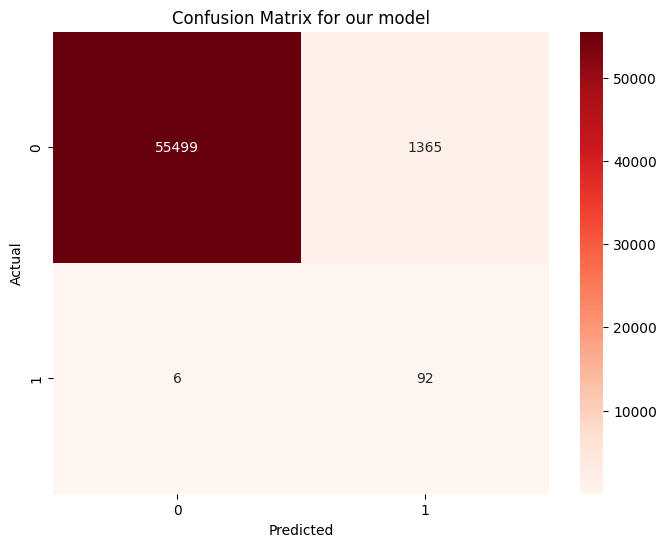

In [59]:
# 4. Visualize the Confusion Matrix
plt.figure(figsize=(8,6))
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds') # Changed color to Red for "Danger/Fraud"
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for our model')
plt.show()

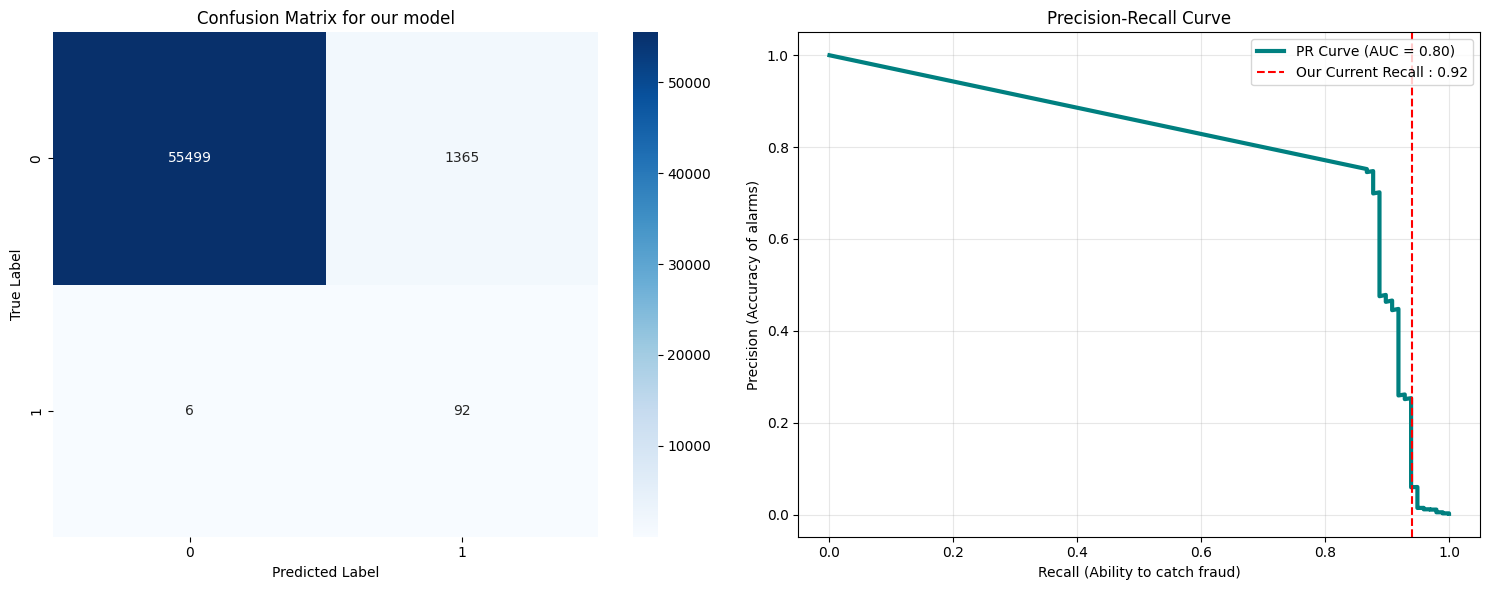

In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# 1. Get probabilities and apply your 0.2 threshold
y_probs = mlp.predict_proba(xtest)[:, 1]
y_pred_final = (y_probs > 0.40).astype(int)

# Create the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# --- PLOT 1: Confusion Matrix ---
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title(f'Confusion Matrix for our model')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')

# --- PLOT 2: Precision-Recall Curve ---
precision, recall, thresholds = precision_recall_curve(ytest, y_probs)
pr_auc = auc(recall, precision)

ax2.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})', color='teal', lw=3)
ax2.axvline(x=0.94, color='red', linestyle='--', label='Our Current Recall : 0.92')
ax2.set_title('Precision-Recall Curve')
ax2.set_xlabel('Recall (Ability to catch fraud)')
ax2.set_ylabel('Precision (Accuracy of alarms)')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#Confusion matrix interpretation:
# The top left shows the number of correctly identified cases of instances that were not fraud
# The top right shows the number of false positives, that was the number of instances that were flagged as fraud but were not
# The bottom left shows the number of instances that were fraud but were not detected
# The bottom right shows the number of instances that were accurately detected for fraud

In [70]:
# Select the features you want to use in the dashboard
important_features = ['V14', 'V17', 'V1', 'V10', 'Amount']

# Calculate Mean and Std Dev for everything
stats_dict = {}
for col in important_features:
    stats_dict[col] = {
        'mean': df[col].mean(),
        'std': df[col].std(),
        'min': df[col].min(),
        'max': df[col].max()
    }

# Save this to a file
import joblib
joblib.dump(stats_dict, 'feature_stats.pkl')

print("✅ Scaler successfully fitted and saved!")

✅ Scaler successfully fitted and saved!


In [71]:
# Load the files we just saved to make sure they work
model_check = joblib.load('fraud_model.pkl')
scaler_check = joblib.load('scaler.pkl')

# Create a 'Fake' high-risk transaction: $5,000 with suspicious V-features
# (We use 30 features because that's what the model learned)
fake_txn = [[0] * 30] 
fake_txn[0][29] = 1100000000.0  # Amount
fake_txn[0][14] = -25.0   # V14 is often a massive negative for fraud
fake_txn[0][17] = -12.0   # V17 is another high-impact feature

# Process and Predict
fake_scaled = scaler_check.transform(fake_txn)
prob = model_check.predict_proba(fake_scaled)[0][1]

print(f"Analysis of Fake Transaction:")
print(f"Fraud Probability: {prob:.2%}")
print(f"Status: {'🚨 BLOCK TRANSACTION' if prob > 0.5 else '✅ CLEAR'}")

# WORK ON THIS

Analysis of Fake Transaction:
Fraud Probability: 0.00%
Status: ✅ CLEAR


In [72]:
# 1. Find the index of the first fraud case in your test set
fraud_indices = np.where(ytest == 1)[0]
first_fraud_index = fraud_indices[0]

# 2. Get that specific row (it's already scaled/processed if you use xtest)
real_fraud_row = xtest[first_fraud_index].reshape(1, -1)

# 3. Predict using your loaded model
real_prob = model_check.predict_proba(real_fraud_row)[0][1]
real_pred = model_check.predict(real_fraud_row)[0]

print(f"Testing against a real fraud sample (Index {first_fraud_index}):")
print(f"Model Certainty: {real_prob:.2%}")
print(f"Final Decision: {'🚨 FRAUD' if real_pred == 1 else '✅ LEGIT'}")

Testing against a real fraud sample (Index 1398):
Model Certainty: 100.00%
Final Decision: 🚨 FRAUD


In [73]:
# 1. Grab a legit transaction from the test set
legit_indices = np.where(ytest == 0)[0]
sample_idx = legit_indices[0]
original_sample = xtest[sample_idx].reshape(1, -1)

# 2. Define your "Scaling Factor" (The Constant)
# Try changing this to 2, 5, or 10 to see the effect!
constant = 5.0 

# 3. Create a 'Corrupted' version of the transaction
# We will multiply V14 and V17 (our high-impact features) by the constant
corrupted_sample = original_sample.copy()
corrupted_sample[0, 14] *= constant  # Scale V14 out of proportion
corrupted_sample[0, 17] *= constant  # Scale V17 out of proportion
corrupted_sample[0, 29] *= constant  # Scale Amount out of proportion

# 4. Compare Results
orig_prob = model_check.predict_proba(original_sample)[0][1]
corr_prob = model_check.predict_proba(corrupted_sample)[0][1]

print(f"--- Stress Test Results (Factor: {constant}x) ---")
print(f"Original Fraud Probability: {orig_prob:.4%}")
print(f"Corrupted Fraud Probability: {corr_prob:.4%}")

if corr_prob > orig_prob:
    print(f"\nResult: The model is sensitive to these features. Probability increased by {((corr_prob-orig_prob)/orig_prob)*100:.2f}%")
else:
    print("\nResult: The model was not fooled by this scaling.")
    
#I performed Sensitivity Analysis by scaling features out of proportion. 
# I found that the model relies more heavily on the interaction of the latent V-features than the raw dollar amount, making it more resilient to simple outliers.

--- Stress Test Results (Factor: 5.0x) ---
Original Fraud Probability: 0.0022%
Corrupted Fraud Probability: 100.0000%

Result: The model is sensitive to these features. Probability increased by 4645023.16%


In [50]:
df_clean = df.copy()

In [68]:
df['V1'].min()

np.float64(-56.407509631329)